TP0 - Presentado por Esteban García

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import math
from random import random
from mpl_toolkits.mplot3d import axes3d

torch.manual_seed(12345)

> 1) **Sistemas Lineales**
>>1)Demuestre la linealidad de los siguientes sistemas:
>>> a) $$ g(t)=u(t) + 5 $$
 


In [2]:
def checkAdditivity(operator, u1, u2):  
  x = torch.arange(0.0, 5.0, 0.1)   
  right = operator(u1(x)) + operator(u2(x))
  left = operator(u1(x) + u2(x))

  difference = torch.abs(right - left);  
  sumDifference = difference.sum()

  print("Left evaluation: ", left)
  print("Right evaluation: ", right)
  print("Difference: ", sumDifference)
  return (sumDifference < 0.0001)


def checkHomogeneity(operator, u, alpha):
  x = torch.arange(0.0, 5.0, 0.1)
  right = alpha * operator(u(x))
  left = operator(alpha * u(x))

  difference = torch.abs(right - left);  
  sumDifference = difference.sum()

  print("Left evaluation: ", left)
  print("Right evaluation: ", right)
  print("Difference: ", sumDifference)
  return (sumDifference < 0.0001)


def checkLinearity(operator, u1, u2):  
  t = torch.arange(0.0, 10.0, 0.1)  
  alpha = torch.randn(1,1);
  beta = torch.randn(1,1)  
  
  right = alpha * operator(u1(t), t) + beta * operator(u2(t), t)
  left = operator(alpha * u1(t) + beta * u2(t), t)
  
  difference = torch.abs(right - left);
  sumDifference = difference.sum()
  
  print("Left evaluation: ", left)
  print("Right evaluation: ", right)
  print("Difference: ", sumDifference)
  return (sumDifference < 0.0001)
  
#test scalar (alpha)
alpha = torch.randn(1,1);

#test functions
u1 = lambda x: x + 2
u2 = lambda x: torch.sin(x)

def operator_a(u):
  return u + 5

print("Additivity: ", checkAdditivity(operator_a, u1, u2))


Left evaluation:  tensor([ 7.0000,  7.1998,  7.3987,  7.5955,  7.7894,  7.9794,  8.1646,  8.3442,
         8.5174,  8.6833,  8.8415,  8.9912,  9.1320,  9.2636,  9.3855,  9.4975,
         9.5996,  9.6917,  9.7738,  9.8463,  9.9093,  9.9632, 10.0085, 10.0457,
        10.0755, 10.0985, 10.1155, 10.1274, 10.1350, 10.1392, 10.1411, 10.1416,
        10.1416, 10.1423, 10.1445, 10.1492, 10.1575, 10.1702, 10.1881, 10.2122,
        10.2432, 10.2817, 10.3284, 10.3838, 10.4484, 10.5225, 10.6063, 10.7001,
        10.8038, 10.9175])
Right evaluation:  tensor([12.0000, 12.1998, 12.3987, 12.5955, 12.7894, 12.9794, 13.1646, 13.3442,
        13.5174, 13.6833, 13.8415, 13.9912, 14.1320, 14.2636, 14.3854, 14.4975,
        14.5996, 14.6917, 14.7738, 14.8463, 14.9093, 14.9632, 15.0085, 15.0457,
        15.0755, 15.0985, 15.1155, 15.1274, 15.1350, 15.1392, 15.1411, 15.1416,
        15.1416, 15.1423, 15.1445, 15.1492, 15.1575, 15.1702, 15.1881, 15.2122,
        15.2432, 15.2817, 15.3284, 15.3838, 15.4484, 15.

>>> c) $$ g(t)=max(u(t))$$

In [3]:
def operator_c(u):
  return torch.max(u)

print("Additivity: ", checkAdditivity(operator_c, u1, u2))


Left evaluation:  tensor(5.9175)
Right evaluation:  tensor(7.8996)
Difference:  tensor(1.9820)
Additivity:  tensor(False)


>>> e) $$ g(t)=|u(t)|$$

In [4]:
def operator_e(u):
  return torch.abs(u)

print("Homogenity: ", checkHomogeneity(operator_e, u1, -1))

Left evaluation:  tensor([2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000, 2.8000,
        2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000, 3.7000,
        3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000, 4.5000, 4.6000,
        4.7000, 4.8000, 4.9000, 5.0000, 5.1000, 5.2000, 5.3000, 5.4000, 5.5000,
        5.6000, 5.7000, 5.8000, 5.9000, 6.0000, 6.1000, 6.2000, 6.3000, 6.4000,
        6.5000, 6.6000, 6.7000, 6.8000, 6.9000])
Right evaluation:  tensor([-2.0000, -2.1000, -2.2000, -2.3000, -2.4000, -2.5000, -2.6000, -2.7000,
        -2.8000, -2.9000, -3.0000, -3.1000, -3.2000, -3.3000, -3.4000, -3.5000,
        -3.6000, -3.7000, -3.8000, -3.9000, -4.0000, -4.1000, -4.2000, -4.3000,
        -4.4000, -4.5000, -4.6000, -4.7000, -4.8000, -4.9000, -5.0000, -5.1000,
        -5.2000, -5.3000, -5.4000, -5.5000, -5.6000, -5.7000, -5.8000, -5.9000,
        -6.0000, -6.1000, -6.2000, -6.3000, -6.4000, -6.5000, -6.6000, -6.7000,
        -6.8000, -6.9000])
Differe

>>2) Demuestre si los siguientes sistemas con múltiples variables de entrada y salida escalar, cumplen la condición de homogeneidad absoluta, superposición. 
>>> a) $\ell_{1}$

In [5]:
def testAdditivity(l, iterations, vectorLen):
  for x in range(iterations):
    v1 = torch.rand(vectorLen)
    v2 = -torch.rand(vectorLen)
    normv1_v2 = l(v1 + v2)
    norm_v1_norm_v2 = l(v1) + l(v2)
    equal = torch.abs(normv1_v2 - norm_v1_norm_v2).sum() < 0.0001

    if(not equal):
      print("\tIteration: {}\n\tv1: {}\n\tv2: {}\n\tl(v1+v2): {}\n\tl(v1)+l(v2): {}\n\tadditivity: {}\n"
      .format(x, v1, v2, normv1_v2, norm_v1_norm_v2, equal))
      return

def testAbsoluteHomogeneus(l, iterations, vectorLen):

  for x in range(iterations):
    v = torch.rand(vectorLen)
    t = torch.tensor([random()])
    norm_t_v = l(t * v)
    t_norm_v = torch.abs(t) * l(v)
    equal = torch.abs(norm_t_v - t_norm_v).sum() < 0.0001

    if(not equal):
      print("\tIteration: {}\n\tv1: {}\n\tv2: {}\n\tl(v1+v2): {}\n\tl(v1)+l(v2): {}\n\Absolute Homogeneus: {}\n"
      .format(x, v1, v2, normv1_v2, norm_v1_norm_v2, equal))
      return
      
  print("\tIteration: {}\n\tv: {} \n\tt: {} \n\tl(tv): {} \n\t|t|*l(v): {} \n\tAbsolute Homogeneus: True".format(iterations, v, t, l(t * v), torch.abs(t) * l(v)))

def l1(vector):
  return torch.sum(torch.abs(vector))

print("l1:")
testAdditivity(l1, 50, 5)
testAbsoluteHomogeneus(l1, 50, 5)

l1:
	Iteration: 0
	v1: tensor([0.0832, 0.1784, 0.3674, 0.5676, 0.3376])
	v2: tensor([-0.2119, -0.4594, -0.8154, -0.9157, -0.2531])
	l(v1+v2): 1.2902050018310547
	l(v1)+l(v2): 4.1899309158325195
	additivity: False

	Iteration: 50
	v: tensor([0.3327, 0.9537, 0.2282, 0.6184, 0.8260]) 
	t: tensor([0.8375]) 
	l(tv): 2.4780373573303223 
	|t|*l(v): tensor([2.4780]) 
	Absolute Homogeneus: True


>>> b) $\ell_{2}$

In [6]:
def l2(vector):  
  return torch.sqrt(torch.sum(vector * vector))

print("l2:")
testAdditivity(l2, 50, 5)
testAbsoluteHomogeneus(l1, 50, 5)

l2:
	Iteration: 0
	v1: tensor([0.7350, 0.2185, 0.5385, 0.5623, 0.8317])
	v2: tensor([-0.2623, -0.0739, -0.1475, -0.8653, -0.7863])
	l(v1+v2): 0.7008470296859741
	l(v1)+l(v2): 2.5828490257263184
	additivity: False

	Iteration: 50
	v: tensor([0.7216, 0.4680, 0.0052, 0.2831, 0.2618]) 
	t: tensor([0.2063]) 
	l(tv): 0.3588462173938751 
	|t|*l(v): tensor([0.3588]) 
	Absolute Homogeneus: True


>>> c) $\ell_{\infty}$

In [7]:
def lInf(vector):
  return torch.max(torch.abs(vector))

print("lInf:")
testAdditivity(lInf, 50, 5)
testAbsoluteHomogeneus(l1, 50, 5)

lInf:
	Iteration: 0
	v1: tensor([0.1795, 0.6024, 0.6641, 0.2036, 0.0725])
	v2: tensor([-0.8274, -0.7801, -0.6542, -0.6782, -0.4216])
	l(v1+v2): 0.6479170322418213
	l(v1)+l(v2): 1.4915645122528076
	additivity: False

	Iteration: 50
	v: tensor([0.2418, 0.8513, 0.3714, 0.9178, 0.7209]) 
	t: tensor([0.6747]) 
	l(tv): 2.0936405658721924 
	|t|*l(v): tensor([2.0936]) 
	Absolute Homogeneus: True


>>> d) $g\left(\vec{x}\right)=\vec{w}\cdot\vec{x}+b$

In [8]:
vectorLen = 5
w = torch.rand(vectorLen)
b = torch.tensor([random()])

def g(vector):
  return torch.dot(w, vector) + b

print("lInf:")

testAdditivity(g, 50, vectorLen)


lInf:
	Iteration: 0
	v1: tensor([0.2825, 0.5294, 0.3998, 0.3194, 0.7273])
	v2: tensor([-0.3324, -0.7131, -0.5841, -0.6338, -0.5916])
	l(v1+v2): tensor([0.8620])
	l(v1)+l(v2): tensor([1.7940])
	additivity: False



> **2) Vectores**

In [9]:
def plot3d():
  
  #Plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  
  #labels
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
    
  return ax

def plotVectors(V, mu, ax, show = True):
  
  k = list(V.size())[1]
  
  for i in range(k):  
    x1 = [mu[0].numpy(), V[0,i].numpy()]
    x2 = [mu[1].numpy(), V[1,i].numpy()]
    x3 = [mu[2].numpy(), V[2,i].numpy()]

    print(x1, x2, x3)
    
    ax.plot(x1, x2, x3)

  if show:
    plt.show()
    
  return ax


>> 1) Graficación y propiedades de los vectores
>>> a) Grafique los siguientes vectores: $$\vec{v}_{1}=\begin{bmatrix}-0.3\\
0.8\\
0.1
\end{bmatrix}, \vec{v}_{2}=\begin{bmatrix}0.5\\
0.2\\
0.4
\end{bmatrix} ,\vec{v}_{3}=\begin{bmatrix}\frac{1}{\sqrt{2}}\\
\frac{-1}{\sqrt{2}}\\
0
\end{bmatrix}$$

[array(0.), array(-0.3)] [array(0.), array(0.8)] [array(0.), array(0.1)]
[array(0.), array(0.5)] [array(0.), array(0.2)] [array(0.), array(0.4)]
[array(0.), array(0.70710678)] [array(0.), array(-0.70710678)] [array(0.), array(0.)]


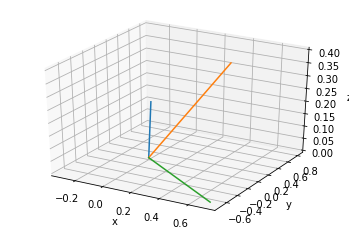

In [10]:
origin = torch.tensor([0.0, 0.0, 0.0], dtype=torch.double)
v1 = torch.tensor([-0.3, 0.8, 0.1], dtype=torch.double)
v2 = torch.tensor([0.5, 0.2, 0.4], dtype=torch.double)
v3 = torch.tensor([(1.0/math.sqrt(2)), (-1.0/math.sqrt(2)), 0], dtype=torch.double)

vectors = torch.stack([v1, v2, v3], dim=1)

ax = plot3d()

#ax.view_init(0  , 0)

plotVectors(vectors, origin, ax, True)

>>> b) Demuestre cuáles de los vectores anteriores son unitarios.

In [11]:
def vectorMagnitude(vector):  
  return torch.sqrt(torch.sum(vector * vector))
  
def unitary(vector):
  return torch.abs(vectorMagnitude(vector) - torch.tensor(1.0)) < 0.0001

print("Unitary v1?: ", unitary(v1))
print("Unitary v2?: ", unitary(v2))
print("Unitary v3?: ", unitary(v3))


Unitary v1?:  tensor(False)
Unitary v2?:  tensor(False)
Unitary v3?:  tensor(True)


>>> c) Calcule el ángulo en grados, entre los vectores $\vec{v}_{1}$y $\vec{v}_{2}, \vec{v}_{2}$ y $\vec{v}_{3}$ y $\vec{v}_{1}$ y $\vec{v}_{3}$, implementando la fórmula en Pytorch, sin usar las funciones correspondientes de la biblioteca

In [12]:
def similarity(vector_1, vector_2):
  return torch.rad2deg(torch.acos(torch.dot(vector_1, vector_2) / (vectorMagnitude(vector_1) * vectorMagnitude(vector_2))))

print("Angle v1-v2: ",similarity(v1, v2))
print("Angle v2-v3: ",similarity(v2, v3))
print("Angle v1-v3: ",similarity(v1, v3))

Angle v1-v2:  tensor(85.0293, dtype=torch.float64)
Angle v2-v3:  tensor(71.5651, dtype=torch.float64)
Angle v1-v3:  tensor(154.7150, dtype=torch.float64)


>>>d) Calcule la distancia en $\ell_{1}, \ell_{2},$ y $\ell_{\infty}$ entre los vectores $\vec{v}_{1}$y $\vec{v}_{2}, \vec{v}_{2}$ y $\vec{v}_{3}$ y $\vec{v}_{1}$ y $\vec{v}_{3}$

In [13]:
print("Distance l1,   v1-v2: ", l1(v1 - v2))
print("Distance l2,   v1-v2: ", l2(v1 - v2))
print("Distance lInf, v1-v2: ", lInf(v1 - v2))

print("Distance l1,   v2-v3: ", l1(v2 - v3))
print("Distance l2,   v2-v3: ", l2(v2 - v3))
print("Distance lInf, v2-v3: ", lInf(v2 - v3))

print("Distance l1,   v1-v3: ", l1(v1 - v3))
print("Distance l2,   v1-v3: ", l2(v1 - v3))
print("Distance lInf, v1-v3: ", lInf(v1 - v3))

Distance l1,   v1-v2:  tensor(1.7000, dtype=torch.float64)
Distance l2,   v1-v2:  tensor(1.0440, dtype=torch.float64)
Distance lInf, v1-v2:  tensor(0.8000, dtype=torch.float64)
Distance l1,   v2-v3:  tensor(1.5142, dtype=torch.float64)
Distance l2,   v2-v3:  tensor(1.0128, dtype=torch.float64)
Distance lInf, v2-v3:  tensor(0.9071, dtype=torch.float64)
Distance l1,   v1-v3:  tensor(2.6142, dtype=torch.float64)
Distance l2,   v1-v3:  tensor(1.8154, dtype=torch.float64)
Distance lInf, v1-v3:  tensor(1.5071, dtype=torch.float64)


>> 2) Propiedades del producto punto:
>>> a) Demuestre la conmutatividad del producto punto. con una implementación en Pytorch, usando como entrada un arreglo de 50 arreglos generados al azar, adjunte un pantallazo con la salida de la comparación del resultado a ambos lados de la igualdad, o en su defecto, demuestre el no cumplimiento de la propiedad con un contraejemplo

In [14]:
def dotProduct(vector_1, vector_2):
  return torch.sum(vector_1 * vector_2)

def testDotProduct(iterations, vectorLen):
  for x in range(iterations):
    v1 = torch.rand(vectorLen)
    v2 = torch.rand(vectorLen)
    v1dotv2 = dotProduct(v1,v2)
    v2dotv1 = dotProduct(v2,v1)
    equal = torch.eq(v1dotv2, v2dotv1)

    if(not equal):
      print("Iteration: {}\nv1: {}\nv2: {}\nv1.v2: {}\nv2.v1: {}\nCommutativity: {}\n"
      .format(x, v1, v2, v1dotv2, v2dotv1, equal))
      return

  print("\tIteration: {}\n\tv1: {} \n\tv2: {} \n\tv1.v2: {} \n\tv2.v1: {} \n\tCommutativity: True"
  .format(iterations, v1, v2, dotProduct(v1,v2), dotProduct(v2,v1)))

testDotProduct(50, 5)

	Iteration: 50
	v1: tensor([0.3269, 0.6408, 0.1994, 0.3066, 0.3716]) 
	v2: tensor([0.6879, 0.7973, 0.8393, 0.8849, 0.7124]) 
	v1.v2: 1.4391593933105469 
	v2.v1: 1.4391593933105469 
	Commutativity: True


> 3) **Funciones multivariable**
>> 1) Funciones lineales multivariable
>>> a) Tómese $\vec{w}_{1}=\begin{bmatrix}0.5\\
0.2
\end{bmatrix}$ para la función $f_{1}$ y $\vec{w}_{2}=\begin{bmatrix}-0.1\\
0.05
\end{bmatrix}$ para la función $f_{2}$, (funciones con dominio en $\mathbb{R}^{2}$ y codominio en $\mathbb{R}$). Grafique ambos planos en Pytorch. 

<Figure size 432x432 with 0 Axes>

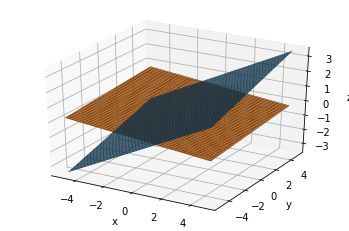

In [15]:
x = torch.arange(-5,5,0.1)
y = torch.arange(-5,5,0.1)
X,Y = torch.meshgrid(x,y)
Z1 = 0.5 * X + 0.2 * Y
Z2 = -0.1 * X + 0.05 * Y

fig = plt.figure(figsize=(6,6))
#ax = fig.add_subplot(111, projection='3d')
ax = plot3d()

ax.plot_surface(X.numpy(), Y.numpy(), Z1.numpy())
ax.plot_surface(X.numpy(), Y.numpy(), Z2.numpy())

plt.show()

>>2) El vector gradiente: Para cada una de las siguientes funciones multivariable: grafique su superficie, calcule el vector gradiente manualmente, evaluelo y grafique el vector unitario en la dirección del gradiente para los dos puntos especificados (en la misma figura de la superficie) y calcule la magnitud de tal vector gradiente en cada punto.
>>> a)$f\left(x,y\right)=x^{3}y^{2}+1$, evaluación del gradiente en los puntos $ P_{0}=\left(0,0\right)$ y $P_{1}=\left(7.4,-6.3\right).$

P= (0.0, 0.0) 
	gradient: tensor([0., 0.]) 
	magnitude:  tensor(0.) 
	unitary: tensor([0., 0.])


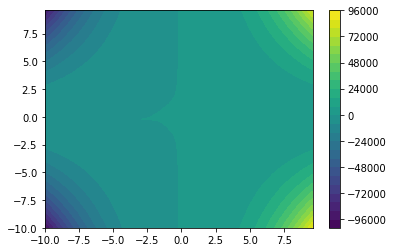

P= (7.4, -6.3) 
	gradient: tensor([ 6520.2734, -5105.8223]) 
	magnitude:  tensor(8281.5088) 
	unitary: tensor([ 0.7873, -0.6165])


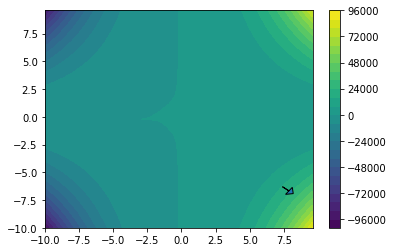

In [16]:
def gradientf(P):
  x, y = P
  return torch.tensor([ddx(x,y), ddy(x,y)])

def normalize(v):
  return F.normalize(v, p=2, dim=-1)

def f(x, y):
  return (x**3) * (y**2) + 1

def ddx(x, y):
  return (3*x**2) * (y**2)

def ddy(x, y):
  return (2*x**3) * y

P0 = (0.0, 0.0)
P1 = (7.4, -6.3)

def plot_contour(f, P):
  
  x = torch.arange(-10,10,0.7)
  y = torch.arange(-10,10,0.7)
  X,Y = torch.meshgrid(x,y)
  Z = f(X,Y)

  g = gradientf(P)
  Px, Py = P
  gx = normalize(g)[0]
  gy = normalize(g)[1]

  print("P=",P,
      "\n\tgradient:", g, 
      "\n\tmagnitude: ", l2(g),
      "\n\tunitary:", normalize(g))

  fig, ax = plt.subplots(1,1)
  cp = ax.contourf(X.numpy(), Y.numpy(), Z.numpy(), 30)
  fig.colorbar(cp) 
  ax.arrow(Px, Py, gx, gy, length_includes_head=True, head_width=0.8, head_length=0.4)

  plt.show()

plot_contour(f, P0)
plot_contour(f, P1)

>>> b) $f\left(x,y\right)=e^{x}+e^{y}+2x^{2}+4y+3,$ evaluación del gradiente en los puntos $P_{0}=\left(3.8,1.8\right)$ y $P_{1}=\left(6.2,7\right).$

P= (3.8, 1.8) 
	gradient: tensor([59.9012, 10.0496]) 
	magnitude:  tensor(60.7383) 
	unitary: tensor([0.9862, 0.1655])


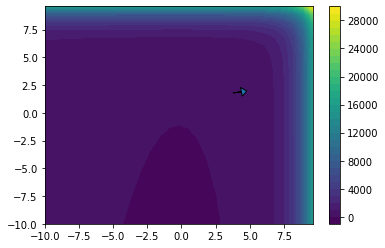

P= (6.2, 7) 
	gradient: tensor([ 517.5490, 1100.6332]) 
	magnitude:  tensor(1216.2444) 
	unitary: tensor([0.4255, 0.9049])


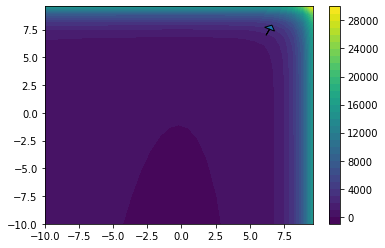

In [17]:
def f(x,y):
  return torch.exp(x) + torch.exp(y) + (2*x**2) + 4*y + 3

def ddx(x, y):
  return 4*x + math.e**x

def ddy(x, y):
  return math.e**y + 4

P0 = (3.8, 1.8)
P1 = (6.2, 7)

plot_contour(f, P0)
plot_contour(f, P1)

>>>c) $f\left(x,y\right)=\ln\left(x^{2}+y^{2}\right),$ evaluación del gradiente en los puntos $P_{0}=\left(-2.4,6.7\right)$ y $P_{1}=\left(0,4.3\right).$

P= (-2.4, 6.7) 
	gradient: tensor([-0.0948,  0.2646]) 
	magnitude:  tensor(0.2810) 
	unitary: tensor([-0.3372,  0.9414])


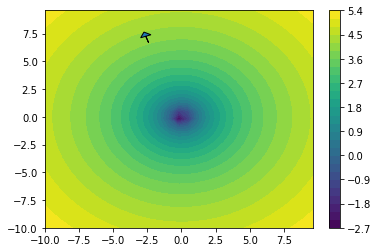

P= (0, 4.3) 
	gradient: tensor([0.0000, 0.4651]) 
	magnitude:  tensor(0.4651) 
	unitary: tensor([0., 1.])


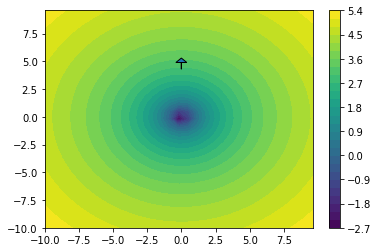

In [18]:
def f(x, y):
  return torch.log(x**2.0 + y**2.0)

def ddx(x, y):
  return (2*x) / (x**2 + y**2)

def ddy(x, y):
  return (2*y) / (x**2 + y**2)

P0 = (-2.4, 6.7)
P1 = (0, 4.3)

plot_contour(f, P0)
plot_contour(f, P1)